# 太陽位置の計算


In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
from math import cos, sin, asin, atan, atan2, pi, ceil, floor, sqrt
from datetime import date

# 太陽赤緯

太陽の天球の赤道面に対する高度 $\delta$ を*太陽赤緯*という。

以下の近似式で求めることができる。

$\delta = 0.33281 - 22.984 \cdot cos(\omega J) - 0.34990 \cdot cos(2 \omega J ) - 0.13980 \cdot cos(3 \omega J) + 3.7872 \cdot sin(\omega J) + 0.03250 \cdot sin(2 \omega J) + 0.07187 \cdot sin(3 \omega J)$

ここで、

* $ω = \cfrac{2 \pi}{365}$
* $J = 元日からの通算日数 + 0.5$

1年間の太陽赤緯をグラフにプロットすると分かるように、
夏至の太陽赤緯は+23.45°で、冬至は-23.45°に位置する。
(北緯を＋、南緯を-とする。)

また、春分・秋分には赤道上の真上にあることが分かる。


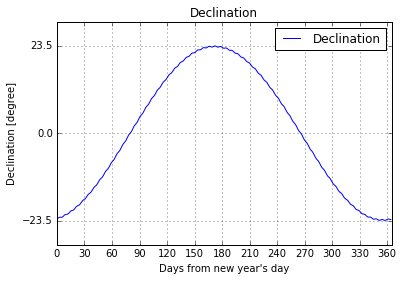

In [2]:
def get_decl(d):
    omega = 2.0 * pi / 365
    J = d + 0.5
    decl = 0.33281 - 22.984 * cos(omega*J) - 0.34990*cos(2.0*omega*J) - 0.13900 * cos(3.0*omega+J) + 3.7872 * sin(omega*J) + 0.03250*sin(2.0*omega*J) + 0.07187 * sin(3.0*omega*J)
    return decl

days = range(365)
plt.title("Declination")
plt.plot(days, [get_decl(d) for d in days], label='Declination')
plt.xlabel("Days from new year's day")
plt.ylabel("Declination [degree]")
plt.xlim(0,365)
plt.xticks([x*30 for x in range(13)])
plt.yticks([-23.5, 0, 23.5])
plt.grid()
plt.legend(loc="upper right")
plt.show()

2017年の日本の春分は3月20日、夏至は6月21日、秋分は9月23日、冬至は12月21日なので、それぞれの日の太陽赤緯を求めてみる。

In [3]:
for dt in [date(2017,3,20),date(2017,6,21),date(2017,9,23), date(2017,12,21)]:
    d = (dt - date(2017,1,1)).days
    print("{0}:{1}".format(d,get_decl(d)))
    

78:-0.562308946456
171:23.3660592289
265:0.259419428095
354:-23.2081824373


# 均時差

真太陽時と平均太陽時の時刻のずれを*均時差 $e$*という。

以下のCIEの近似式で求めることができる。

$e = 0.0072 \cdot cos(\omega J) - 0.0528 \cdot cos(2 \omega J ) - 0.0012 \cdot cos(3 \omega J ) - 0.1229 \cdot sin(\omega J ) - 0.1565 \cdot sin(2 \omega J ) - 0.0041 \cdot sin(3 \omega J )$

(参考1: http://k-ichikawa.blog.enjoy.jp/etc/HP/js/sunRise/srs.html)
(参考2: http://sigbox.web.fc2.com/calc/calc2.html)



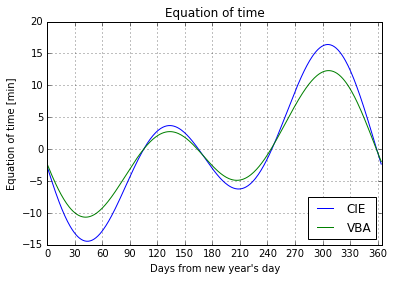

In [101]:
def get_et(d):
    omega = 2.0 * pi / 365
    J = d
    et = 0.0072 * cos(omega*J) - 0.0528*cos(2.0*omega*J) - 0.0012*cos(3.0*omega*J) - 0.1229*sin(omega*J) - 0.1565*sin(2.0*omega*J) - 0.0041*sin(3.0*omega*J)
    return et

def get_et2(y, d):
    mconDelta0 = -23.4393  #冬至の日赤緯
    sin_d0 = sin(mconDelta0 * pi /180)     #sin_d0 = 0.39778...
    n = y - 1968
    
    d0 =3.71 + 0.2596 * n - floor((n + 3) / 4)

    M = 360 * (d + 1 - d0) / 365.2596    #[deg]
    eps = 12.3901 + 0.0172 * (n + M / 360)
    
    V = M + 1.914 * sin(M * pi / 180) + 0.02 * sin(2 * M * pi / 180)
       
    Veps_rad = (V + eps) * pi / 180
    sin_d = cos(Veps_rad) * sin_d0
    cos_d = sqrt(1.0 - sin_d0 * sin_d0)
    
    Et1 = M - V
    Et2 = atan(0.043 * sin(2*Veps_rad)/ (1.0 - 0.043 * cos(2*Veps_rad))) * 180 / pi
    
    Et = (Et1 - Et2)
    
    return Et/20

days = range(365)
plt.title("Equation of time")
plt.plot(days, [get_et(d)*60 for d in days], label='CIE')
plt.plot(days, [get_et2(2007,d)*60 for d in days], label='VBA')
plt.xlabel("Days from new year's day")
plt.ylabel("Equation of time [min]")
plt.xlim(0,365)
plt.xticks([x*30 for x in range(13)])
plt.grid()
plt.legend(loc="lower right")
plt.show()

『最新建築環境工学』 P.82 表3-1 より

* 1月1日の均時差 $e$ = -3分11.7秒
* 2月1日の均時差 $e$ = -13分28.5秒
* 3月1日の均時差 $e$ = -12分30.6秒
* 4月1日の均時差 $e$ = -4分7.8秒
* 5月1日の均時差 $e$ = +2分48.2秒
* 6月1日の均時差 $e$ = +2分18.4秒

同じ値が計算で得られるかを次の通り確認した。（それなりにずれる。）

In [94]:
for M in range(6):
    d = (date(2015,M+1,1) - date(2015,1,1)).days
    m = get_et2(2007,d)*60
    s = (m - floor(m)) * 60
    print("{0}min {1}sec".format(floor(m),s))

-48.0min 10.072950584sec
-202.0min 1.70246997057sec
-188.0min 29.0822255026sec
-62.0min 0.504126813912sec
41.0min 57.0618535934sec
34.0min 34.4198356074sec


# 時角

時角：　t　[単位： 度]

$t_m = T_m + \cfrac{L - 135}{15}$

$t_h = t_m + e$

$t = 15 \cdot t_h - 180$

ここで、
* $t_h$: (地方)真太陽時(経度$L$の観測点における) 
* $t_m$: 地方平均太陽時(経度$L$の観測点における) 
* $T_m$: (日本)中央標準時(東経 135° 明石)
* $t$: 真太陽時の時角[°] (12時以前はマイナス、12時以降はプラス)

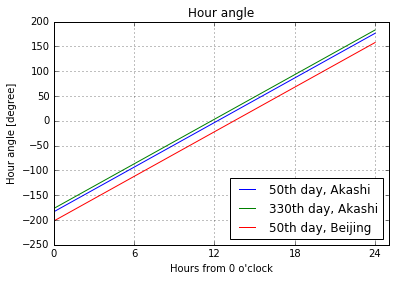

In [61]:
def get_hourangle(d, Tm, longtitude):
    tm = Tm + (longtitude - 135)/15
    th = tm + get_et(d)
    t = 15 * th - 180
    return t

hours = range(25)
plt.title("Hour angle")
plt.plot(hours, [get_hourangle(50, h, 135) for h in hours], label='50th day, Akashi')
plt.plot(hours, [get_hourangle(330, h, 135) for h in hours], label='330th day, Akashi')
plt.plot(hours, [get_hourangle(50, h, 116.39) for h in hours], label='50th day, Beijing')
plt.xlabel("Hours from 0 o'clock")
plt.ylabel("Hour angle [degree]")
plt.xticks([0,6,12,18,24])
plt.grid()
plt.legend(loc="lower right")
plt.show()


6月1日の正午の東京の時角＝5.35°

In [38]:
L = 139.46
phi = 35.41
d = (date(2015,6,1) - date(2015,1,1)).days
print(get_hourangle(d, 12, L))
print(get_hourangle2(2015, d, 12, L))


5.05892116999
-1.13483265612


# 太陽高度

高度（仰角）：　h

$sin h = sin \varphi sin \delta + cos \varphi cos \delta cos t$

すなわち、

$h = sin^{-1} \{ sin(\varphi)sin(\delta) + cos(\varphi)cos(\delta)cos(t) \} $

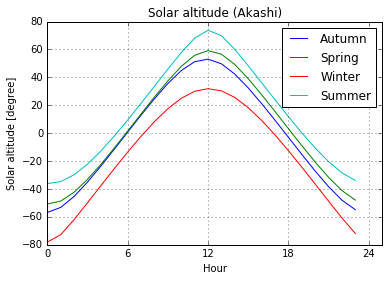

In [8]:
def get_h(d, Ts, longtitude, latitude):
    decl_rad = get_decl(d) * pi / 180
    t_rad = get_hourangle(d, Ts, longtitude) * pi / 180
    lat_rad = latitude * pi / 180
    h = asin(sin(lat_rad) * sin(decl_rad) + cos(lat_rad) * cos(decl_rad) * cos(t_rad))
    h *= 180 / pi
    return h

hours = [i/4 for i in range(24*4)]
seasons = {"Winter":0, "Spring":90, "Summer":210, "Autumn":270}
for label, d in seasons.items():
    plt.plot(hours, [get_h(ceil(h/24)+d, h%24, 135, 35) for h in hours], label=label)

plt.title("Solar altitude (Akashi)")
plt.xlabel("Hour")
plt.ylabel("Solar altitude [degree]")
plt.xticks([0,6,12,18,24])
plt.grid()
plt.legend(loc="upper right")
plt.show()

# 太陽方位角

方位角：　A（北 = -180, 東 = -90, 南 = 0, 西 = 90°）

$sin A = \cfrac{cos(\delta)sin(t)}{cos(h)}$

$cos A = \cfrac{sin(h)sin(\varphi) - sin(\delta)}{cos(h) \cdot cos(\varphi)}$

太陽方位角を算出するには、$sinA$と$cosA$の符号でどの方位に位置するか判断する。

$sin A > 0, cos A < 0$のとき、太陽位置は、西→北の方位にあり、

$A = tan^{-1}(\frac{sinA}{cosA}) + \pi$

$sin A < 0, cos A < 0$のとき、太陽位置は、東→北の方位にあり、

$A = tan^{-1}(\frac{sinA}{cosA}) - \pi$

その他の場合、

$A = tan^{-1}(\frac{sinA}{cosA})$

※ただし、atan2関数を用いれば、このような場合分けは関数側で実施される。

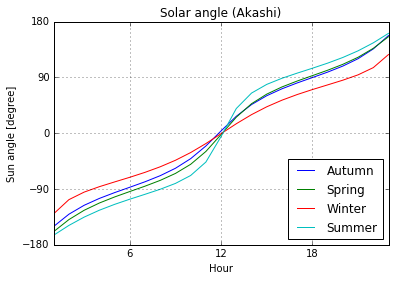

In [21]:
def get_A(d, Ts, longtitude, latitude):
    decl_rad = get_decl(d) * pi / 180
    h_rad = get_h(d, Ts, longtitude, latitude) * pi / 180
    t_rad = get_hourangle(d, Ts, longtitude) * pi / 180
    lat_rad = latitude * pi / 180
    sinA = cos(decl_rad) * sin(t_rad) / cos(h_rad)
    cosA = (sin(h_rad) * sin(lat_rad) - sin(decl_rad)) / (cos(h_rad) * cos(lat_rad))
    A = atan2(sinA, cosA)
    A *= 180 / pi
    return A

hours = [(i+1)/4 for i in range(24*4-1)]
seasons = {"Winter":0, "Spring":90, "Summer":210, "Autumn":270}
for label, d in seasons.items():
    plt.plot(hours, [get_A(ceil(h/24)+d, h%24, 135, 35) for h in hours], label=label)

plt.title("Solar angle (Akashi)")
plt.xlabel("Hour")
plt.ylabel("Sun angle [degree]")
plt.xticks([0,6,12,18,24])
plt.yticks([-180,-90,0,90,180])
plt.xlim(1,23)
plt.ylim(-180,180)
plt.legend(loc="lower right")
plt.grid()
plt.show()